# 제주 여행 키워드

20/01 ~ 20/06  
월별 건수의 약 20%
1월달 - 14,443건 2884건
2월달 - 10,912건 2184건 
3월달 - 11,832건 2366건
4월달 - 9,108건  1820건
5월달 - 11,124건 2219건
6월달 - 13,945건 2786건

In [1]:
from konlpy.tag import Okt
from collections import Counter
import re
from PIL import Image
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

## 데이터

In [2]:
# 샘플 크롤링 데이터 불러오기
blog = pd.read_csv('C:/Users/keogu/Desktop/빅데이터 자료분석/20-01.csv')

In [3]:
blog

날짜  관광 명소  \
0      2020. 1. 4. 17:51  제주 여행   
1      2020. 1. 18. 1:00  제주 여행   
2      2020. 1. 22. 8:00  제주 여행   
3      2020. 1. 11. 1:00  제주 여행   
4      2020. 1. 9. 18:10  제주 여행   
...                  ...    ...   
2879  2020. 1. 25. 18:32  제주 여행   
2880  2020. 1. 22. 21:48  제주 여행   
2881  2020. 1. 26. 23:41  제주 여행   
2882  2020. 1. 23. 18:20  제주 여행   
2883  2020. 1. 18. 17:51  제주 여행   

                                                     제목  \
0                                      201910 1박2일 제주여행   
1                                       (아이 위주) 겨울 제주여행   
2                                제주 여행: 꼭 가야할 성산 가볼만한곳~   
3                              【11월 제주여행】아기가 좋아하는 #양떼목장   
4                               겨울제주여행 동백꽃의 절정 제주동백포레스트   
...                                                 ...   
2879     제주여행(1) 다랑쉬오름, 월정리해변, 춘식당, 소낭게스트하우스, 제주에서의 런닝.   
2880                  제주여행 :: 우도 배시간 확인, 전기차 타고 우도 여행하기   
2881    [여행]1월 제주 여행 제주살이 제주도 여행 제주도 가볼만한 곳 제주도 명소 한림공원   
2882  [ 제주여행 2박 3일 마지막 날] 2018년 여름휴가 마지막 날은 소인국 테마파크...   
2883  [국내/제주여행] 제주 서귀포 가성비 좋은 숙소 '헤이서귀포' (다소 주관적일 수 있음)   

                                                     내용  \
0                                                   NaN   
1     올해 9세, 7세가 된 조카와 함께 한 3박 4일 제주여행.\n이틀은 수영장+야외 ...   
2      성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면  겨울에만 볼 수 있는 ...   
3     #11월제주여행\n#아기랑제주여행\n#아기가좋아하는\n#양떼목장이야기\n날씨가 정말...   
4     겨울제주여행 동백꽃의 절정인 제주동백포레스트 \n작년부터 핫하게 제주도 동백꽃의 명...   
...                                                 ...   
2879  단조로운 일상이 무료하게 느껴질 때, 충동적으로 제주도행 비행기를 예매했다.  지난...   
2880  소섬이라 불리우는 섬\n가장 제주도스러운 섬\n제주안의 또다른 제주\n#우도\n성산...   
2881  #제주한림공원고등학교 때 수학여행으로 왔던 오래된 기억 ㅎㅎㅎ\n오랜만에 제주한림공...   
2882  ● 제주 3일차 일정 ●\n기상 - 히든 클리프 호텔&네이쳐 조식 - 추사관 - 소...   
2883  블로그를 뒤적거려보니 숙소 리뷰는 처음인듯...?\n그런김에 이번에 가족여행갔다오면...   

                                                  url       글쓴이  
0     https://blog.naver.com/01693327023/221759734754       나나미  
1          https://blog.naver.com/suikou/221775993387       이재은  
2          https://blog.naver.com/bsy615/221779213051        졸리  
3        https://blog.naver.com/sk198782/221767347945  sk198782  
4        https://blog.naver.com/ckh07301/221765688310    소녀감성주부  
...                                               ...       ...  
2879     https://blog.naver.com/daily-hj/221784948257        진이  
2880    https://blog.naver.com/bluelingo/221782044004       깜장콩  
2881     https://blog.naver.com/essder84/221785982087     Rhema  
2882    https://blog.naver.com/thsek2082/221783038940   도야랑 영이랑  
2883      https://blog.naver.com/abralsj/221776700732      털아저씨  

[2884 rows x 6 columns]

### 전처리

In [4]:
# 블로그 내용 합치기
content_all = ''
for i in range(len(blog)):
    content_all = content_all + ' ' + str(blog['내용'][i]) + ' ' + str(blog['제목'][i])

In [5]:
content_all

' nan 201910 1박2일 제주여행 올해 9세, 7세가 된 조카와 함께 한 3박 4일 제주여행.\n이틀은 수영장+야외 온수풀장이 있는 숙소(표선 해비치호텔&리조트)에서,\n하루는 공항 근처 비즈니스 호텔(트리플 룸-호텔 레오)에서 잤다.\n사전 검색으로 아이와 함께 가기 좋은 곳\n-키티뮤지엄 아일랜드\n-아쿠아플라넷\n-제주 공룡랜드\n-소인국 테마파크\n-코코몽 에코파크\n-퍼시픽 마린스테이지\n-믿거나말거나 박물관 등을 고려했으나\n우리가 간 곳은\n-키티뮤지엄 아일랜드\n-아쿠아플라넷\n-제주 민속촌\n-서프라이즈 테마파크\n-한라산 영실탐방로\n-주상절리\n-용두암\n등이다.\n\'아이 위주\' 제주여행이었지만 아쿠아플라넷 내 스타일(?)이어서 재미있었고\n아이들은 키티뮤지엄 아일랜드를 가장 좋아했다. \n아이들과 함께 여행하기에(초등 고학년은 모르겠고 저학년이나 유아일 경우) 겨울의 제주는 별로인 듯.\n야외활동을 못하니 숙소에 있는 시간이 길다.\n해비치 리조트는 무척 넓고 좋았지만 \'제주까지 왔는데 호텔에만?\' 하는 생각에 거기서도 푹 못 쉰 것 같다.\n2박 했는데 수영장도 한 번밖에 안 갔고, 사우나도 안 갔고.(둘 다 유료)\n여러 번 제주도에 갔지만 \'아이 위주\'로 돌아다니다 보니 "제주도에 이런 곳이?" 하는 데가 많았다. 하지만 만족도는 별로 높지 않았는데 밥 한 끼에 최소 15,000원(미역국, 돈가스 등)이고 입장료도 보통 15,000원.(아쿠아플라넷은 4만원이 넘었고) 어딜 가나 돈돈돈 하는 듯했다.-_-;; 역사적인 볼거리가 아니라 \'관광\'으로 소비되는 눈요기가 더 판을 치는 것 같다고 느낀 건 내추럴한 감상보다 기술적인 구경거리를 선호한 우리의 선택 탓이었는지 모르지.\n첫째 날\n#키티뮤지엄 아일랜드#주상절리#제주민속촌둘째 날\n#해비치호텔리조트 수영장#점심#제주 아쿠아플라넷셋째 날\n#서프라이즈 테마파크#유채꽃밭#2093 수제돈가스넷째 날\n#한라산 영실탐방로#용두암#술결론\n#아이위주 #겨울 #제주여행 추

In [6]:
# 한글만 필터링
content_all = re.sub('[^ㄱ-ㅣ가-힣 ]',"",content_all)

In [7]:
# 최종 블로그 내용 데이터
content_all

'   박일 제주여행 올해 세 세가 된 조카와 함께 한 박 일 제주여행이틀은 수영장야외 온수풀장이 있는 숙소표선 해비치호텔리조트에서하루는 공항 근처 비즈니스 호텔트리플 룸호텔 레오에서 잤다사전 검색으로 아이와 함께 가기 좋은 곳키티뮤지엄 아일랜드아쿠아플라넷제주 공룡랜드소인국 테마파크코코몽 에코파크퍼시픽 마린스테이지믿거나말거나 박물관 등을 고려했으나우리가 간 곳은키티뮤지엄 아일랜드아쿠아플라넷제주 민속촌서프라이즈 테마파크한라산 영실탐방로주상절리용두암등이다아이 위주 제주여행이었지만 아쿠아플라넷 내 스타일이어서 재미있었고아이들은 키티뮤지엄 아일랜드를 가장 좋아했다 아이들과 함께 여행하기에초등 고학년은 모르겠고 저학년이나 유아일 경우 겨울의 제주는 별로인 듯야외활동을 못하니 숙소에 있는 시간이 길다해비치 리조트는 무척 넓고 좋았지만 제주까지 왔는데 호텔에만 하는 생각에 거기서도 푹 못 쉰 것 같다박 했는데 수영장도 한 번밖에 안 갔고 사우나도 안 갔고둘 다 유료여러 번 제주도에 갔지만 아이 위주로 돌아다니다 보니 제주도에 이런 곳이 하는 데가 많았다 하지만 만족도는 별로 높지 않았는데 밥 한 끼에 최소 원미역국 돈가스 등이고 입장료도 보통 원아쿠아플라넷은 만원이 넘었고 어딜 가나 돈돈돈 하는 듯했다 역사적인 볼거리가 아니라 관광으로 소비되는 눈요기가 더 판을 치는 것 같다고 느낀 건 내추럴한 감상보다 기술적인 구경거리를 선호한 우리의 선택 탓이었는지 모르지첫째 날키티뮤지엄 아일랜드주상절리제주민속촌둘째 날해비치호텔리조트 수영장점심제주 아쿠아플라넷셋째 날서프라이즈 테마파크유채꽃밭 수제돈가스넷째 날한라산 영실탐방로용두암술결론아이위주 겨울 제주여행 추천지위 키티뮤지엄 아일랜드 아쿠아플라넷실내라 추위 걱정 안 해도 되고 시간 이상 시간 보내기 좋다위 제주민속촌전부 야외라 날씨가 좋지 않은 날에는 가기 어렵겠지만 꽤 넓고 체험할 것도 제법 있고 장터에서 식사도 가능표선 해수욕장 앞 해비치호텔리조트 굿 여긴 언제 가도 좋을 듯 호캉스 즐기러 가도 좋을 듯 하지만 나는 당분간 제주 

In [8]:
# 워드 클라우드 시각화
okt = Okt()
line = okt.pos(content_all)

# 명사만 필터링
nouns_txt =[]
for word, tag in line:
    if tag in ['Noun']:
        nouns_txt.append(word)
print(nouns_txt)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
# 상위 100개 
counts_nouns = Counter(nouns_txt)
nouns_tags = counts_nouns.most_common(100)

In [10]:
nouns_tags

[('제주', 15295),
 ('여행', 11921),
 ('곳', 7034),
 ('제주도', 6321),
 ('것', 6006),
 ('사진', 5970),
 ('수', 5059),
 ('시간', 4147),
 ('카페', 3827),
 ('때', 3646),
 ('날', 3638),
 ('더', 3473),
 ('숙소', 3313),
 ('우리', 3113),
 ('분', 2966),
 ('정말', 2870),
 ('사람', 2827),
 ('생각', 2809),
 ('맛', 2652),
 ('바다', 2613),
 ('진짜', 2575),
 ('바로', 2381),
 ('여기', 2274),
 ('맛집', 2215),
 ('겨울', 2190),
 ('또', 2175),
 ('호텔', 2108),
 ('나', 2080),
 ('저', 2080),
 ('이', 2077),
 ('도착', 2061),
 ('월', 2015),
 ('정도', 1971),
 ('안', 1952),
 ('공항', 1935),
 ('하나', 1845),
 ('그냥', 1758),
 ('내', 1733),
 ('거', 1728),
 ('아이', 1691),
 ('날씨', 1688),
 ('길', 1667),
 ('코스', 1659),
 ('집', 1649),
 ('좀', 1639),
 ('체험', 1621),
 ('다음', 1613),
 ('그', 1592),
 ('추천', 1591),
 ('아침', 1565),
 ('일', 1547),
 ('보고', 1538),
 ('비', 1526),
 ('이번', 1501),
 ('때문', 1493),
 ('전', 1490),
 ('말', 1486),
 ('근처', 1481),
 ('시', 1473),
 ('귤', 1471),
 ('꼭', 1468),
 ('앞', 1458),
 ('다시', 1429),
 ('차', 1425),
 ('해', 1416),
 ('느낌', 1396),
 ('마지막', 1362),
 ('조금', 1349),
 ('저희'

In [11]:
# 불용어 설정(수작업)
stop_words = "제주 여행 제주도 곳 것 수 때 날 더 분 우리 정말 진짜 바로 여기 또 나 저 이 월 정도 안 하나 그냥 내 거 좀 다음 그 일 이번 때문 꼭 앞 다시 중 위 년 타고 제 번 후" 
stop_words = list(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
nouns_tags = dict(nouns_tags)
[nouns_tags.pop(key) for key in stop_words]

[15295,
 11921,
 6321,
 7034,
 6006,
 5059,
 3646,
 3638,
 3473,
 2966,
 3113,
 2870,
 2575,
 2381,
 2274,
 2175,
 2080,
 2080,
 2077,
 2015,
 1971,
 1952,
 1845,
 1758,
 1733,
 1728,
 1639,
 1613,
 1592,
 1547,
 1501,
 1493,
 1468,
 1458,
 1429,
 1246,
 1162,
 1161,
 1149,
 1136,
 1050,
 1048]

In [12]:
nouns_tags

{'사진': 5970,
 '시간': 4147,
 '카페': 3827,
 '숙소': 3313,
 '사람': 2827,
 '생각': 2809,
 '맛': 2652,
 '바다': 2613,
 '맛집': 2215,
 '겨울': 2190,
 '호텔': 2108,
 '도착': 2061,
 '공항': 1935,
 '아이': 1691,
 '날씨': 1688,
 '길': 1667,
 '코스': 1659,
 '집': 1649,
 '체험': 1621,
 '추천': 1591,
 '아침': 1565,
 '보고': 1538,
 '비': 1526,
 '전': 1490,
 '말': 1486,
 '근처': 1481,
 '시': 1473,
 '귤': 1471,
 '차': 1425,
 '해': 1416,
 '느낌': 1396,
 '마지막': 1362,
 '조금': 1349,
 '저희': 1346,
 '바람': 1325,
 '처음': 1309,
 '예약': 1295,
 '구경': 1277,
 '저녁': 1272,
 '비행기': 1260,
 '감귤': 1232,
 '주문': 1219,
 '돼지': 1200,
 '친구': 1191,
 '일차': 1191,
 '일정': 1179,
 '밥': 1176,
 '가격': 1170,
 '해변': 1141,
 '커피': 1104,
 '동백꽃': 1095,
 '식당': 1083,
 '눈': 1076,
 '방문': 1074,
 '시작': 1073,
 '개': 1072,
 '이용': 1060,
 '서귀포': 1058}

### bar graph

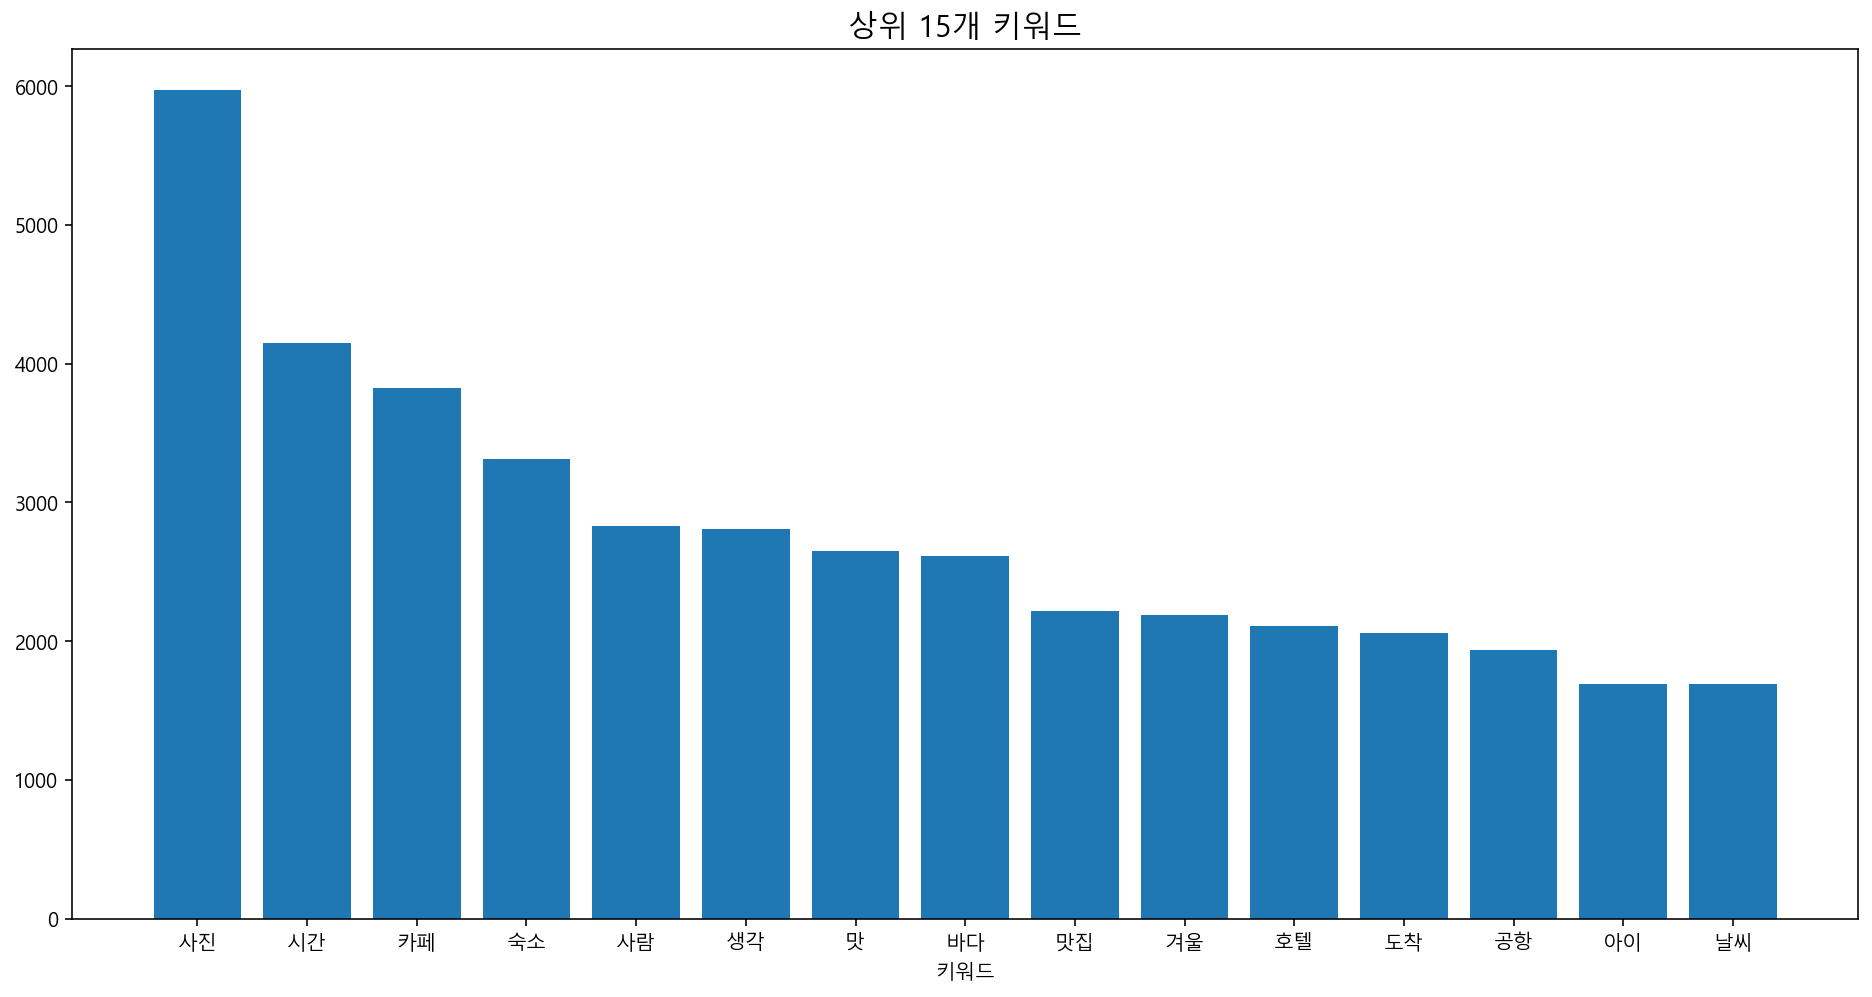

In [13]:
names = list(nouns_tags.keys())
values = list(nouns_tags.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(15),values[:15],tick_label=names[:15])
plt.title('상위 15개 키워드', size=15)
plt.xlabel('키워드', size=10)
plt.savefig('bar graph.png')
plt.show()

### word cloud

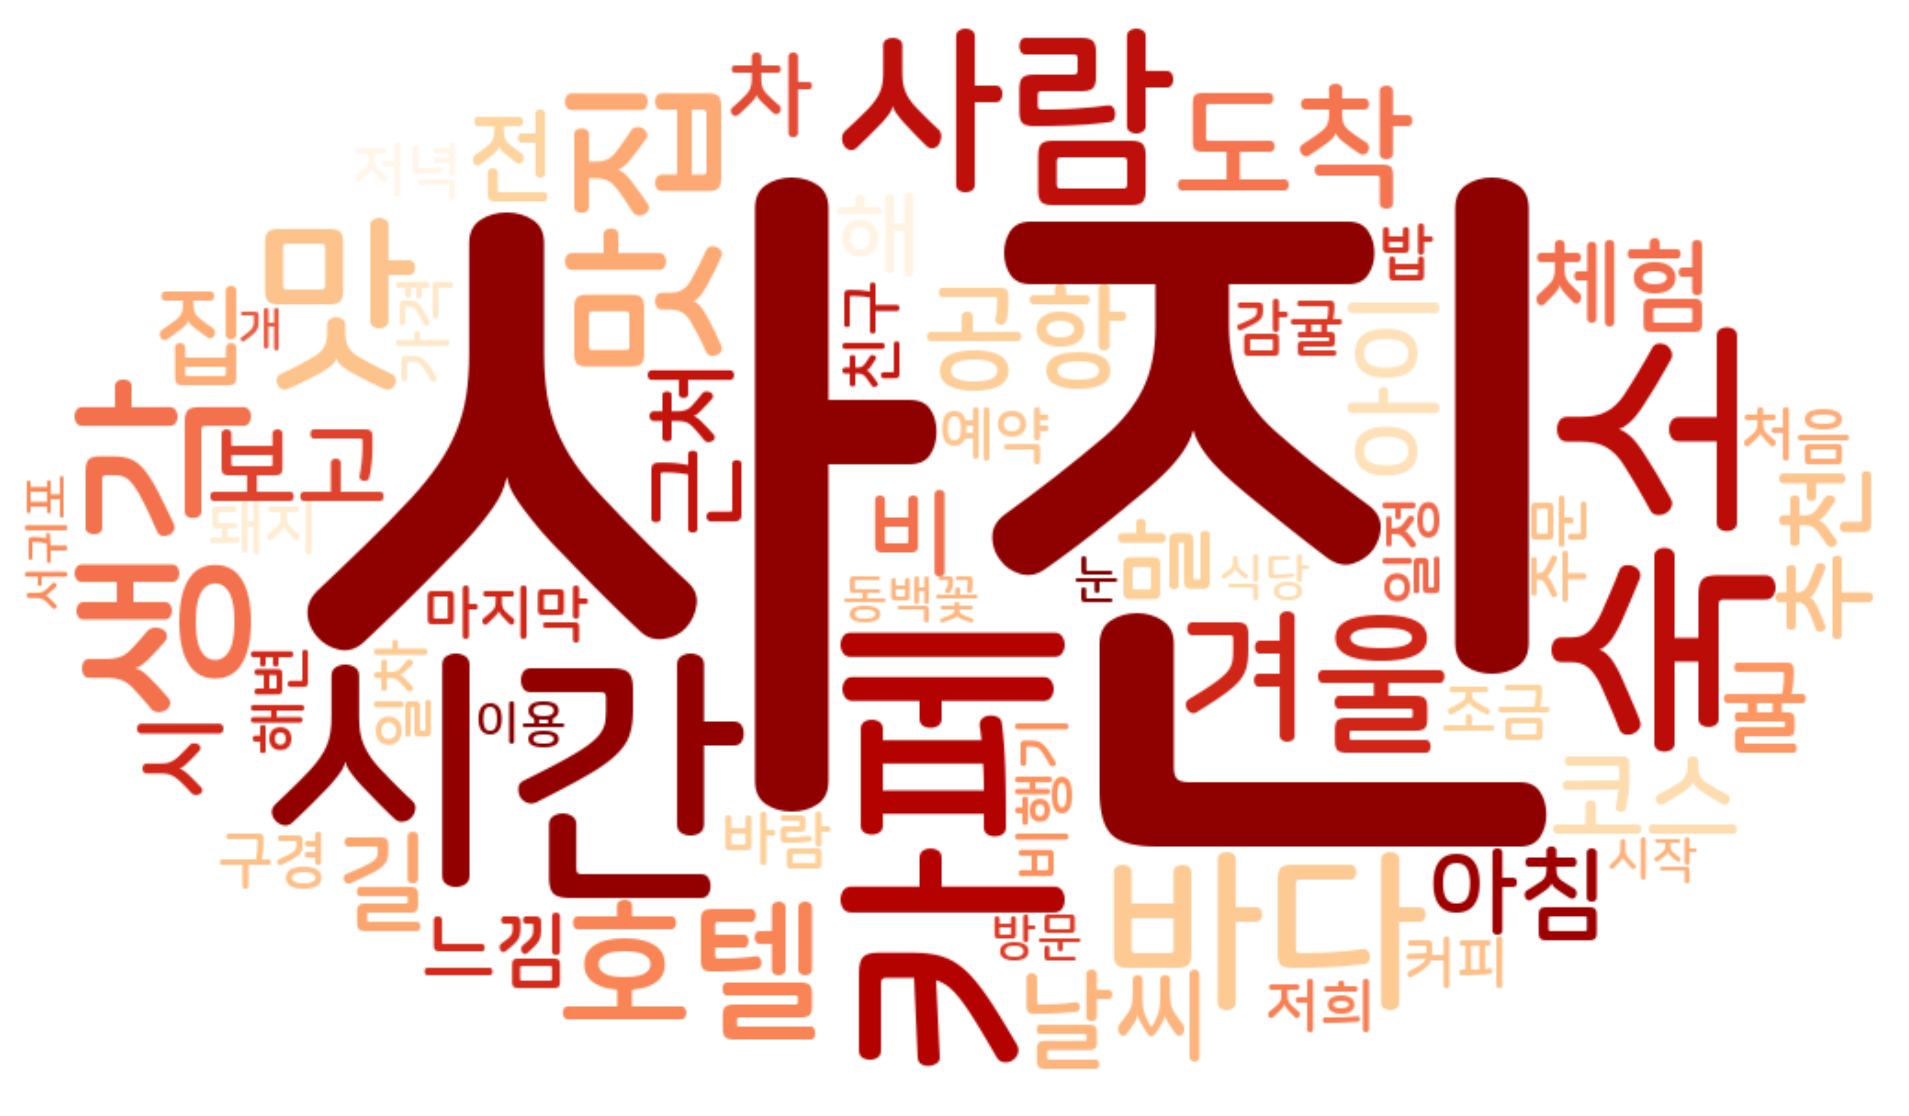

In [14]:
# 워드 클라우드 설정
image = np.array(Image.open('jeju.png'))
font = 'NanumSquareRoundB.ttf'
word_cloud = WordCloud(font_path=font,background_color='white',max_font_size=400, colormap='OrRd', mask=image, stopwords=stop_words).generate_from_frequencies(nouns_tags)
plt.figure(figsize=(26,10))
plt.imshow(word_cloud)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word cloud.png')
plt.show()